In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load raw dataset
DATA_PATH = "C:\\Users\\Chandupa Weerakkody\\Documents\\AIML_LivePROJECT\\2019.csv"
df = pd.read_csv(DATA_PATH)

print("Shape BEFORE:", df.shape)
print("Missing (top):")
print(df.isna().sum().sort_values(ascending=False).head(10))

Shape BEFORE: (7422037, 21)
Missing (top):
Unnamed: 20            7422037
LATE_AIRCRAFT_DELAY    6032784
SECURITY_DELAY         6032784
NAS_DELAY              6032784
WEATHER_DELAY          6032784
CARRIER_DELAY          6032784
AIR_TIME                153805
ARR_DELAY               153805
WHEELS_ON               137647
TAXI_IN                 137647
dtype: int64


In [11]:
# Drop fully empty columns
df = df.dropna(axis=1, how="all")

# Parse date
if "FL_DATE" in df.columns:
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], errors="coerce")

In [12]:
# Handle known delay-cause NaNs as 0
cause_cols = ["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]
present_cause = [c for c in cause_cols if c in df.columns]
if present_cause:
    df[present_cause] = df[present_cause].fillna(0)

In [13]:
# Impute the rest
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

# numeric → median
df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

# categorical → mode (most frequent)
for c in cat_cols:
    if df[c].isna().any():
        m = df[c].mode(dropna=True)
        if not m.empty:
            df[c] = df[c].fillna(m.iloc[0])


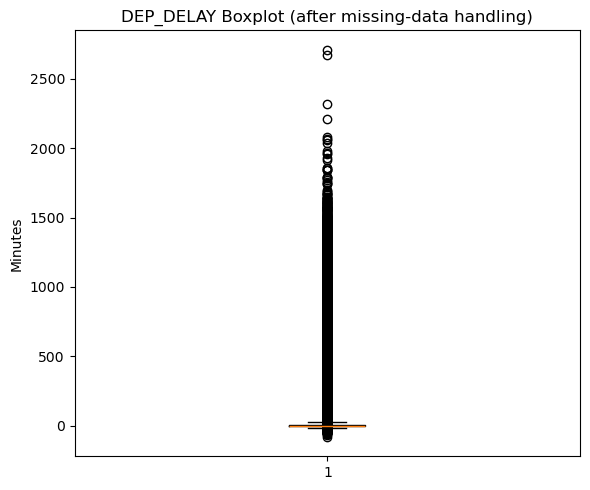

In [18]:
# Boxplot of DEP_DELAY (post-clean)
if "DEP_DELAY" in df.columns:
    plt.figure(figsize=(6, 5))
    plt.boxplot(df["DEP_DELAY"].dropna())
    plt.title("DEP_DELAY Boxplot (after missing-data handling)")
    plt.ylabel("Minutes")
    plt.tight_layout()
    plt.show()

In [20]:
#Quick check
print("\nMissing AFTER (top):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("Shape AFTER:", df.shape)


Missing AFTER (top):
FL_DATE              0
OP_UNIQUE_CARRIER    0
SECURITY_DELAY       0
NAS_DELAY            0
WEATHER_DELAY        0
CARRIER_DELAY        0
DISTANCE             0
AIR_TIME             0
ARR_DELAY            0
ARR_TIME             0
dtype: int64
Shape AFTER: (7422037, 20)


In [22]:
# Saving cleaned dataset for the next member to clean
out_path = "C:\\Users\\Chandupa Weerakkody\\Documents\\AIML_LivePROJECT\\output\\after_missing.csv"
df.to_csv(out_path, index=False)
print(f"Saved: {out_path}")

Saved: C:\Users\Chandupa Weerakkody\Documents\AIML_LivePROJECT\output\after_missing.csv
